# Hello, KAN! 

THIS NOTEBOOK IS NOT MINE. IT IS BASED ON THE FOLLOWING NOTEBOOK [hellokan.ipynb](https://github.com/KindXiaoming/pykan/blob/master/hellokan.ipynb) by [KindXiaoming](https://github.com/KindXiaoming)

### Kolmogorov-Arnold representation theorem

Kolmogorov-Arnold representation theorem states that if $f$ is a multivariate continuous function
on a bounded domain, then it can be written as a finite composition of continuous functions of a
single variable and the binary operation of addition. More specifically, for a smooth $f : [0,1]^n \to \mathbb{R}$,


f(x)=f(x1,...,xn)=2n+1∑q=1Φq(n∑p=1ϕq,p(xp))f(x) = f(x_1,...,x_n)=\sum_{q=1}^{2n+1}\Phi_q(\sum_{p=1}^n \phi_{q,p}(x_p))

where $\phi_{q,p}:[0,1]\to\mathbb{R}$ and $\Phi_q:\mathbb{R}\to\mathbb{R}$. In a sense, they showed that the only true multivariate function is addition, since every other function can be written using univariate functions and sum. However, this 2-Layer width-$(2n+1)$ Kolmogorov-Arnold representation may not be smooth due to its limited expressive power. We augment its expressive power by generalizing it to arbitrary depths and widths.

### Kolmogorov-Arnold Network (KAN)

The Kolmogorov-Arnold representation can be written in matrix form

f(x)=Φout∘Φin∘xf(x)={\bf \Phi}_{\rm out}\circ{\bf \Phi}_{\rm in}\circ {\bf x}

where 

Φin=(ϕ1,1(⋅)⋯ϕ1,n(⋅)⋮⋮ϕ2n+1,1(⋅)⋯ϕ2n+1,n(⋅)),Φout=(Φ1(⋅)⋯Φ2n+1(⋅)){\bf \Phi}_{\rm in}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n}(\cdot) \\ \vdots & & \vdots \\ \phi_{2n+1,1}(\cdot) & \cdots & \phi_{2n+1,n}(\cdot) \end{pmatrix},\quad {\bf \Phi}_{\rm out}=\begin{pmatrix} \Phi_1(\cdot) & \cdots & \Phi_{2n+1}(\cdot)\end{pmatrix}

We notice that both ${\bf \Phi}_{\rm in}$ and ${\bf \Phi}_{\rm out}$ are special cases of the following function matrix ${\bf \Phi}$ (with $n_{\rm in}$ inputs, and $n_{\rm out}$ outputs), we call a Kolmogorov-Arnold layer:

Φ=(ϕ1,1(⋅)⋯ϕ1,nin(⋅)⋮⋮ϕnout,1(⋅)⋯ϕnout,nin(⋅)){\bf \Phi}= (ϕ1,1(⋅)⋯ϕ1,nin(⋅)⋮⋮ϕnout,1(⋅)⋯ϕnout,nin(⋅))\begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n_{\rm in}}(\cdot) \\ \vdots & & \vdots \\ \phi_{n_{\rm out},1}(\cdot) & \cdots & \phi_{n_{\rm out},n_{\rm in}}(\cdot) \end{pmatrix}

${\bf \Phi}_{\rm in}$ corresponds to $n_{\rm in}=n, n_{\rm out}=2n+1$, and ${\bf \Phi}_{\rm out}$ corresponds to $n_{\rm in}=2n+1, n_{\rm out}=1$.

After defining the layer, we can construct a Kolmogorov-Arnold network simply by stacking layers! Let's say we have $L$ layers, with the $l^{\rm th}$ layer ${\bf \Phi}_l$ have shape $(n_{l+1}, n_{l})$. Then the whole network is

KAN(x)=ΦL−1∘⋯∘Φ1∘Φ0∘x{\rm KAN}({\bf x})={\bf \Phi}_{L-1}\circ\cdots \circ{\bf \Phi}_1\circ{\bf \Phi}_0\circ {\bf x}

In constrast, a Multi-Layer Perceptron is interleaved by linear layers ${\bf W}_l$ and nonlinearities $\sigma$:

MLP(x)=WL−1∘σ∘⋯∘W1∘σ∘W0∘x{\rm MLP}({\bf x})={\bf W}_{L-1}\circ\sigma\circ\cdots\circ {\bf W}_1\circ\sigma\circ {\bf W}_0\circ {\bf x}

A KAN can be easily visualized. (1) A KAN is simply stack of KAN layers. (2) Each KAN layer can be visualized as a fully-connected layer, with a 1D function placed on each edge. Let's see an example below.

### Get started with KANs

Initialize KAN

In [1]:
from kan import *
import matplotlib.pyplot as plt
import torch
import numpy as np
from kan.utils import create_dataset
from kan.utils import ex_round
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [2]:


# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=3, k=3, seed=42, device=device)

checkpoint directory created: ./model
saving model version 0.0


Create dataset

In [3]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [4]:
dataset['train_label'][:10]

tensor([[3.1481],
        [6.5976],
        [0.7953],
        [3.4230],
        [3.8323],
        [2.8803],
        [0.4949],
        [0.4471],
        [1.6879],
        [0.7747]])

Plot KAN at initialization

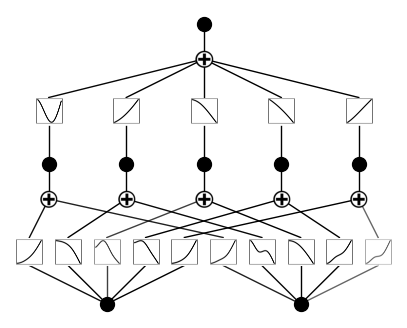

In [5]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot()

Train KAN with sparsity regularization

In [6]:
# train the model
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 1.96e-02 | test_loss: 1.94e-02 | reg: 5.69e+00 | : 100%|█| 50/50 [00:12<00:00,  3.87it

saving model version 0.1


Plot trained KAN

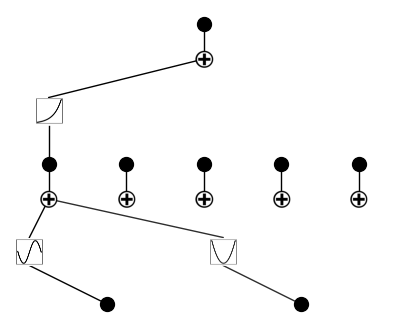

In [7]:
model.plot()

Prune KAN and replot

saving model version 0.2


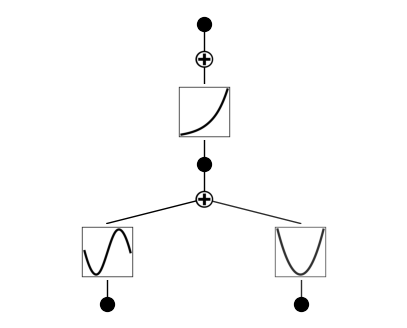

In [8]:
model = model.prune()
model.plot()

Continue training and replot

In [9]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 1.77e-02 | test_loss: 1.70e-02 | reg: 8.22e+00 | : 100%|█| 50/50 [00:05<00:00,  9.21it

saving model version 0.3


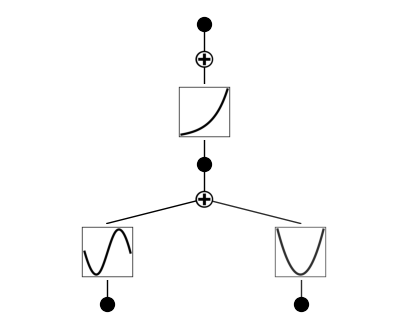

In [10]:
model.plot()

In [11]:
model = model.refine(10)

saving model version 0.4


In [12]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 4.64e-04 | test_loss: 4.71e-04 | reg: 8.17e+00 | : 100%|█| 50/50 [00:05<00:00,  8.38it

saving model version 0.5


Automatically or manually set activation functions to be symbolic

In [13]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.999999919572659, c=2
fixing (0,1,0) with x^2, r2=0.9999999823183098, c=2
fixing (1,0,0) with exp, r2=0.9999999910340671, c=2
saving model version 0.6


Continue training till machine precision

In [14]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 7.93e-10 | test_loss: 5.16e-10 | reg: 0.00e+00 | : 100%|█| 50/50 [00:01<00:00, 25.23it

saving model version 0.7


Obtain the symbolic formula

In [15]:

ex_round(model.symbolic_formula()[0][0],4)

1.0*exp(1.0*x_2**2 + 1.0*sin(3.1416*x_1))

In [16]:
m1 = 0.7083333
m2 = 0.7083333
PP = -1.665046

a = 0
b = 1
m = 2
n = 2

def alpha_func(alpha):
    return alpha ** a * (1 - alpha) ** b

def b1_func():
    return - m1 / (m1 + m2)

def b2_func():
    return m2 / (m1 + m2)

def D_func(alpha):
    b1b1 = b1_func() ** 2
    b2b2 = b2_func() ** 2
    alpha1 = alpha
    alpha2 = 1 - alpha1
    
    return alpha1 * (b1b1 * PP + m1**2) + alpha2 * (b2b2 * PP + m2**2)

def RR_func(alpha):
    b1 = b1_func()
    b2 = b2_func()
    b1b1 = b1 ** 2
    b2b2 = b2 ** 2
    alpha1 = alpha
    alpha2 = 1 - alpha1
    
    return (alpha1**2 * b1b1 + alpha2**2 * b2b2 + 2 * alpha1 * alpha2 * b1 * b2) * PP

def z0_func(t, alpha):
    D = D_func(alpha)
    RR = RR_func(alpha)
    return t * D + t / (1 + t) * RR

def F_func(t, alpha):
    z_0 = z0_func(t, alpha)
    return np.exp(-2*z_0)

def t_alpha_func(t, alpha):
    return (t ** m) / ((1 + t) ** n) * F_func(t, alpha) * alpha_func(alpha)

In [78]:
# f = lambda X: t_alpha_func(X[:, [0]], X[:, [1]])
f = lambda x: torch.exp(torch.sqrt(torch.abs(torch.pi*x[:,[0]])) + x[:,[1]]**2 - torch.cos(x[:,[2]]))

dataset2 = create_dataset(f, n_var=3, device=device)
dataset2['train_input'].shape, dataset2['train_label'].shape

(torch.Size([1000, 3]), torch.Size([1000, 1]))

In [79]:
model2 = KAN(width=[2,5,1], grid=3, k=3, seed=42, device=device)

checkpoint directory created: ./model
saving model version 0.0


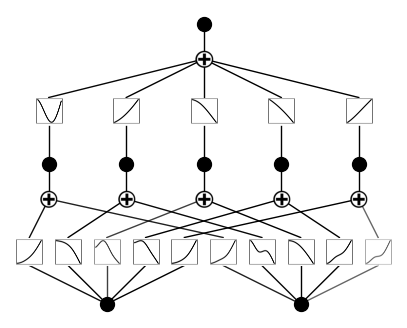

In [80]:
model2(dataset2['train_input']);
model2.plot()

In [81]:
history = model2.fit(dataset2, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 3.41e-01 | test_loss: 3.85e-01 | reg: 1.24e+01 | : 100%|█| 50/50 [00:12<00:00,  3.93it

saving model version 0.1


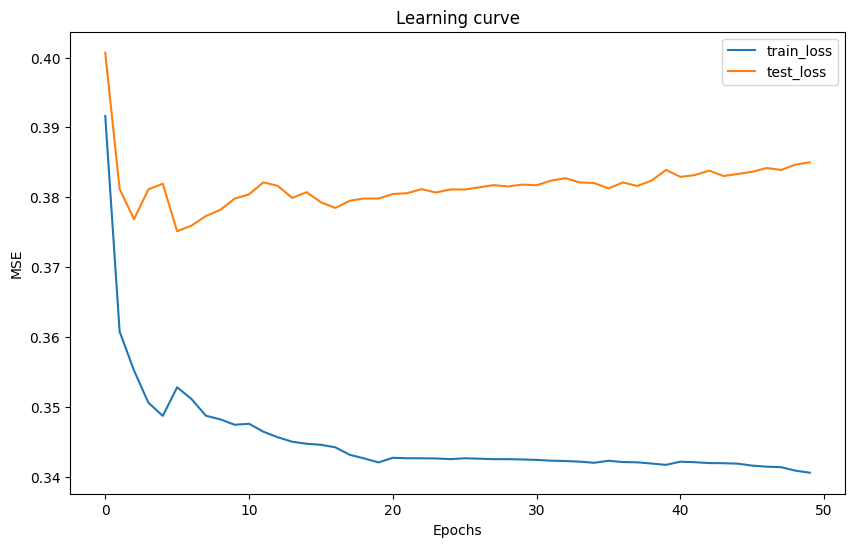

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='train_loss')
plt.plot(history['test_loss'], label='test_loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Learning curve')
plt.legend()
plt.grid(False)
plt.show()

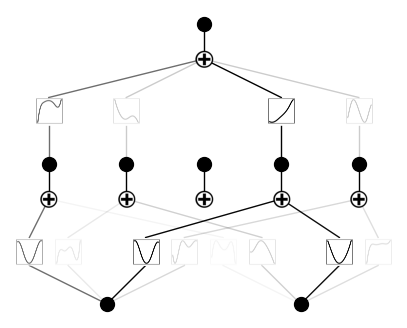

In [84]:
model2.plot()

saving model version 0.2


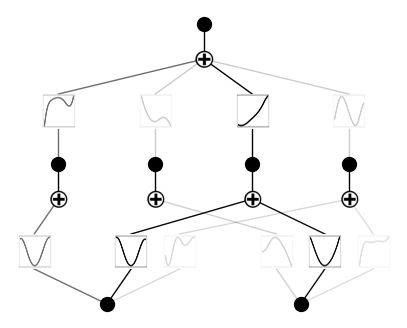

In [85]:
model2 = model2.prune()
model2.plot()

In [86]:
model2 = model2.refine(10)
model2.fit(dataset2, opt="LBFGS", steps=50);

saving model version 0.3


| train_loss: 3.23e-01 | test_loss: 4.32e-01 | reg: 1.47e+01 | : 100%|█| 50/50 [00:09<00:00,  5.09it

saving model version 0.4


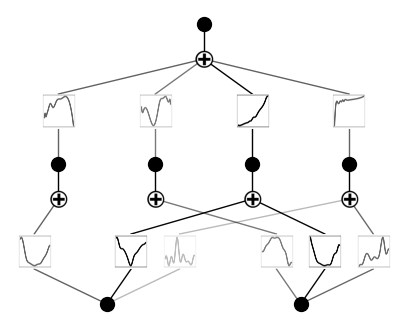

In [87]:
model2.plot()

In [25]:
model2 = model2.prune()


saving model version 0.4


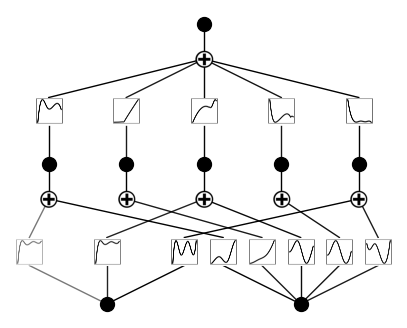

In [26]:
model2.plot()

In [28]:
model2 = model2.refine(10)

saving model version 0.6


In [29]:
model2.fit(dataset2, opt="LBFGS", steps=50);

| train_loss: 8.18e+01 | test_loss: 9.30e+02 | reg: 4.59e+02 | : 100%|█| 50/50 [00:11<00:00,  4.39it

saving model version 0.7


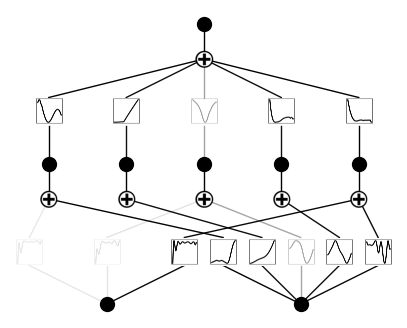

In [30]:
model2.plot()

In [31]:
model2 = model2.prune()


saving model version 0.8


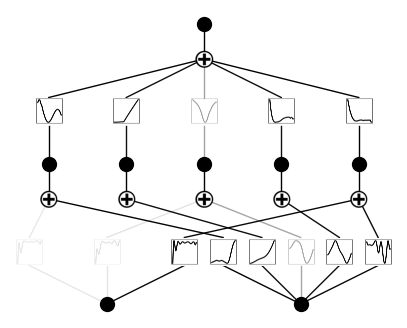

In [32]:
model2.plot()

In [33]:
model2 = model2.refine(10)

saving model version 0.9


In [34]:
model2.fit(dataset2, opt="LBFGS", steps=50);

| train_loss: 6.54e+01 | test_loss: 9.23e+02 | reg: 4.89e+02 | : 100%|█| 50/50 [00:11<00:00,  4.47it

saving model version 0.10


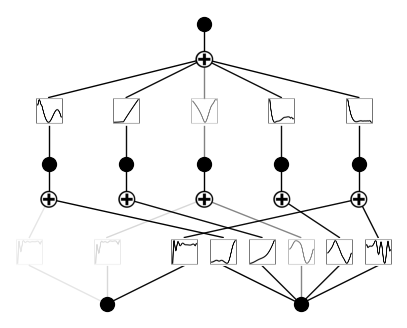

In [35]:
model2.plot()

saving model version 0.11


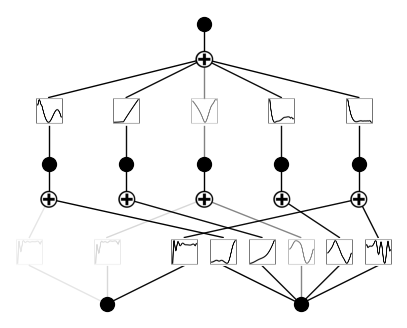

In [37]:
model2 = model2.prune()
model2.plot()

In [38]:
model2 = model2.refine(30)

saving model version 0.12


In [39]:
model2.fit(dataset2, opt="LBFGS", steps=50);

| train_loss: 6.50e+00 | test_loss: 7.78e+02 | reg: 5.12e+02 | : 100%|█| 50/50 [00:14<00:00,  3.37it

saving model version 0.13


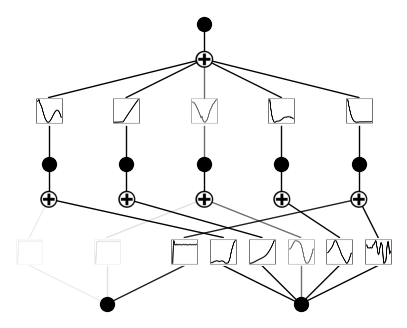

In [40]:
model2.plot()

saving model version 0.14


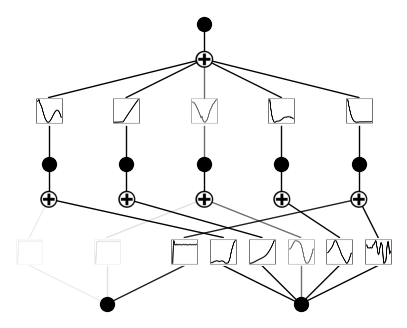

In [41]:
model2.prune()
model2.plot()

In [42]:
model2 = model2.refine(30)

saving model version 0.14


In [43]:
model2.fit(dataset2, opt="LBFGS", steps=100);

| train_loss: 2.38e+00 | test_loss: 8.46e+02 | reg: 5.03e+02 | : 100%|█| 100/100 [00:28<00:00,  3.51

saving model version 0.15


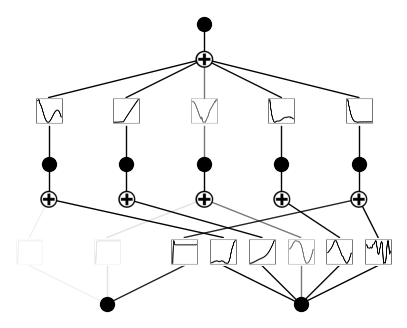

In [44]:
model2.plot()

In [45]:
model2 = model2.refine(100)
model2.fit(dataset2, opt="LBFGS", steps=100);

saving model version 0.16


| train_loss: 8.40e+01 | test_loss: 2.04e+08 | reg: 5.03e+02 | : 100%|█| 100/100 [00:52<00:00,  1.90

saving model version 0.17


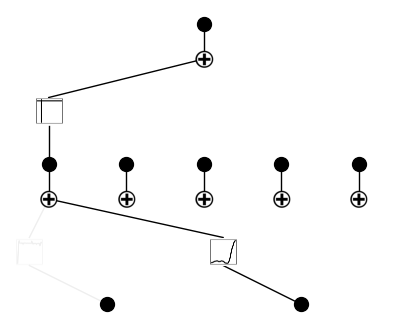

In [46]:
model2.plot()

saving model version 0.18


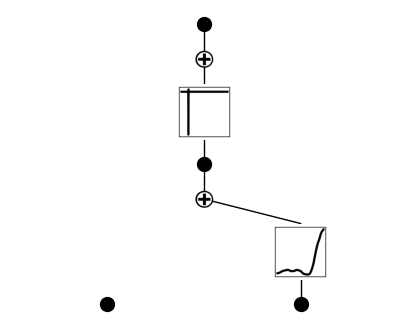

In [47]:
model2 = model2.prune()
model2.plot()